In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks

In [31]:
target_folder = "maqam_53tet"
files = [f for f in os.listdir(target_folder) if f.endswith('.wav')]
files.sort()
notes = {
    "Sol (G4)": 392.00,
    "La (A4)": 440.00,
    "Si (B4)": 493.88,
    "Do (C5)": 523.25,
    "Re (D5)": 587.33,
    "Mi (E5)": 659.25,
    "Fa (F5)": 698.46,
    "Sol (G5)": 783.99,
    "La (A5)": 880.00
}
maqam_notes = {
    391.1: "Rast (G)",
    440.0: "Dügah (A)",
    469.5: "Dik Kürdi (Si b5)",
    488.9: "Segah (B1)",   
    498.0: "Buselik (B)",  
    518.0: "Dik Kürdi",    
    523.3: "Çargah (C)",
    549.5: "Hicaz (C#)",   
    586.7: "Neva (D)",
    659.3: "Hüseyni (E)",
    698.5: "Acem (F)",
    732.0: "Eviç (F#)",
    782.3: "Gerdaniye (G)",
    880.0: "Muhayyer (A)"
}

In [33]:
def find_note_name(freq):
    closest_freq = min(maqam_notes.keys(), key=lambda k: abs(k-freq))
    if abs(closest_freq - freq) < 10:
        return maqam_notes[closest_freq]
    else:
        return ""

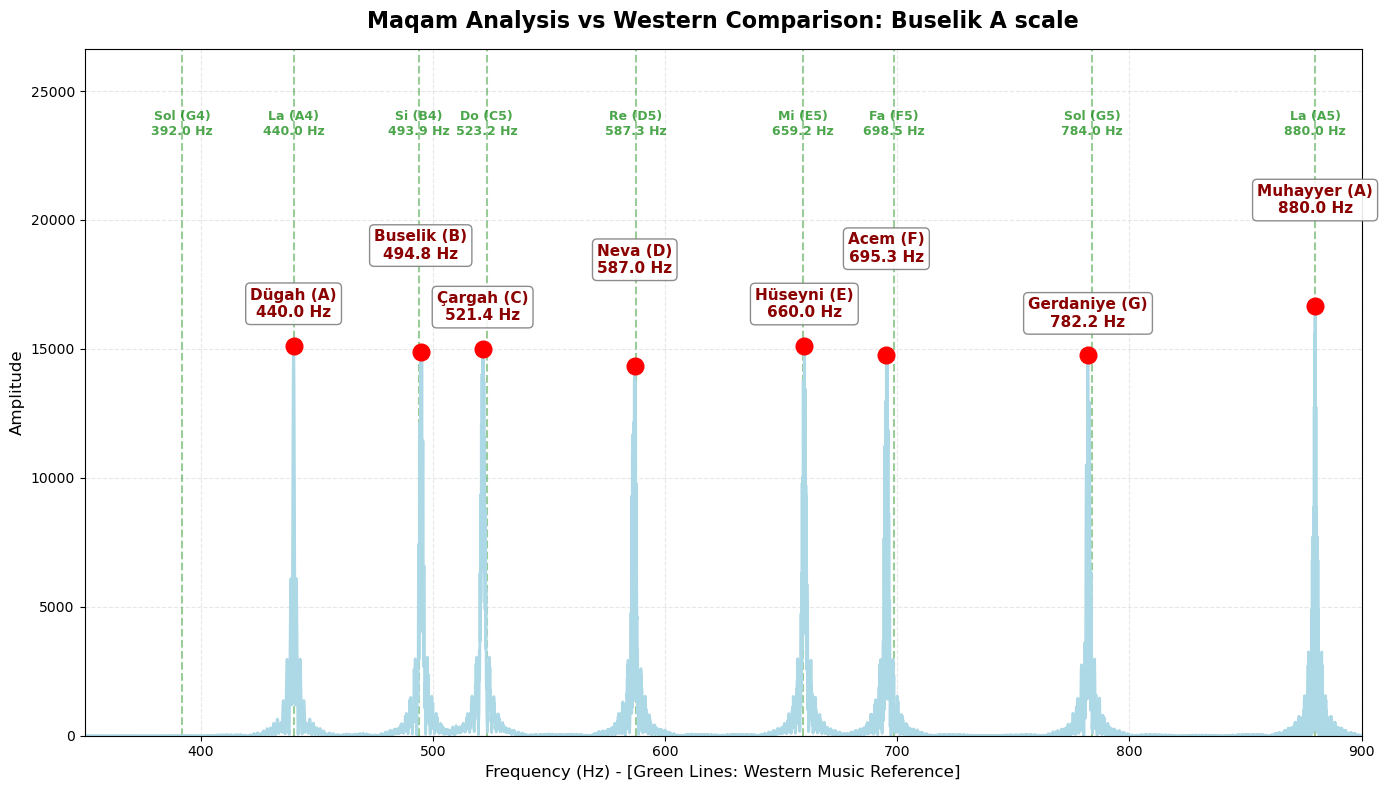

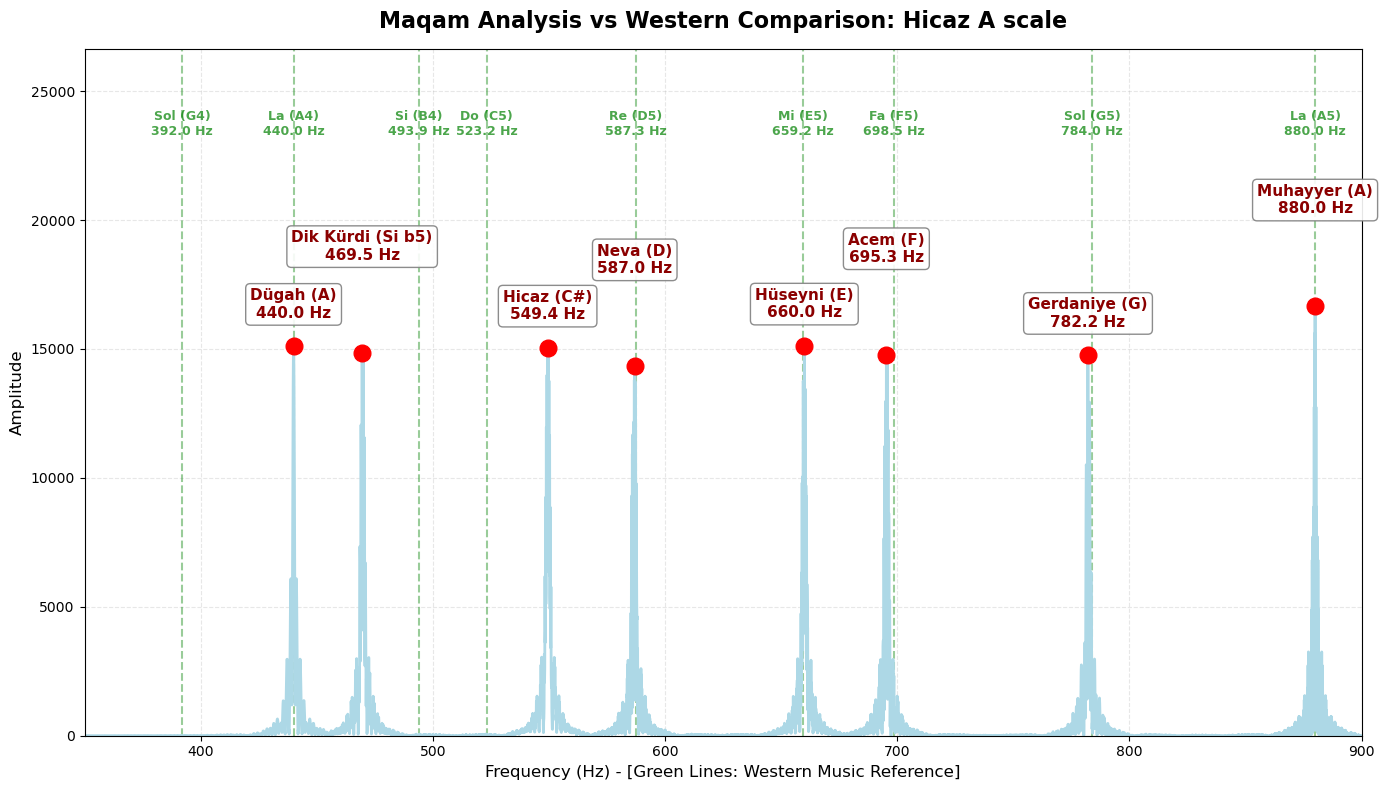

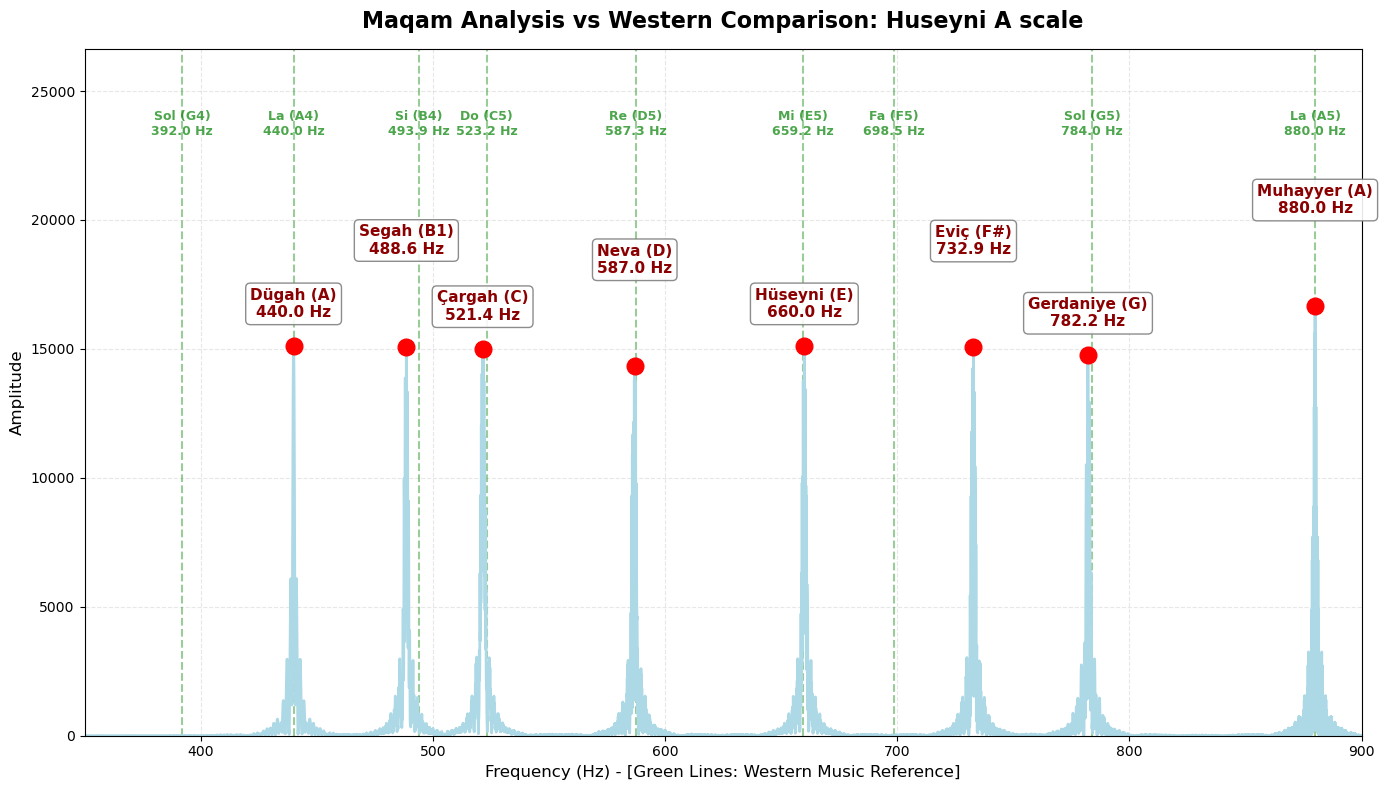

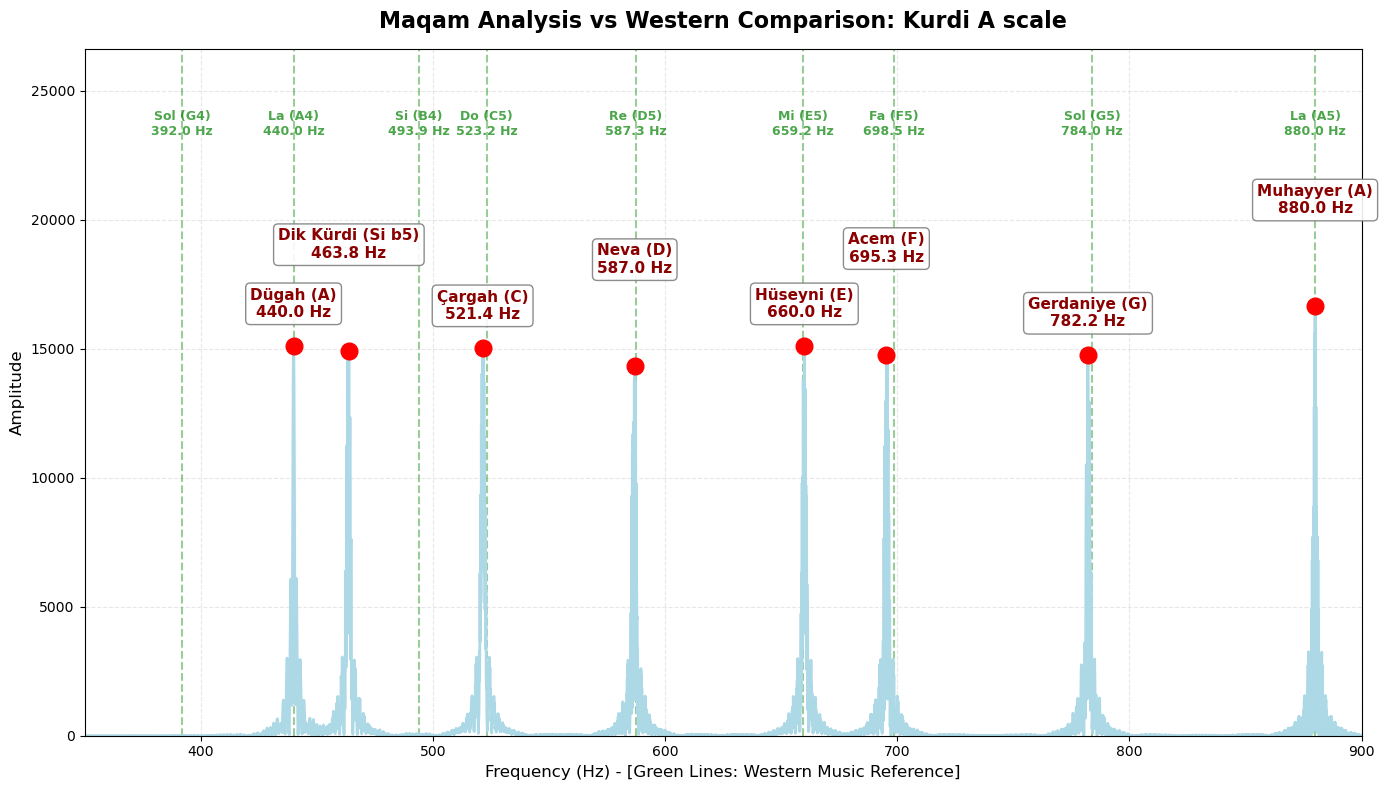

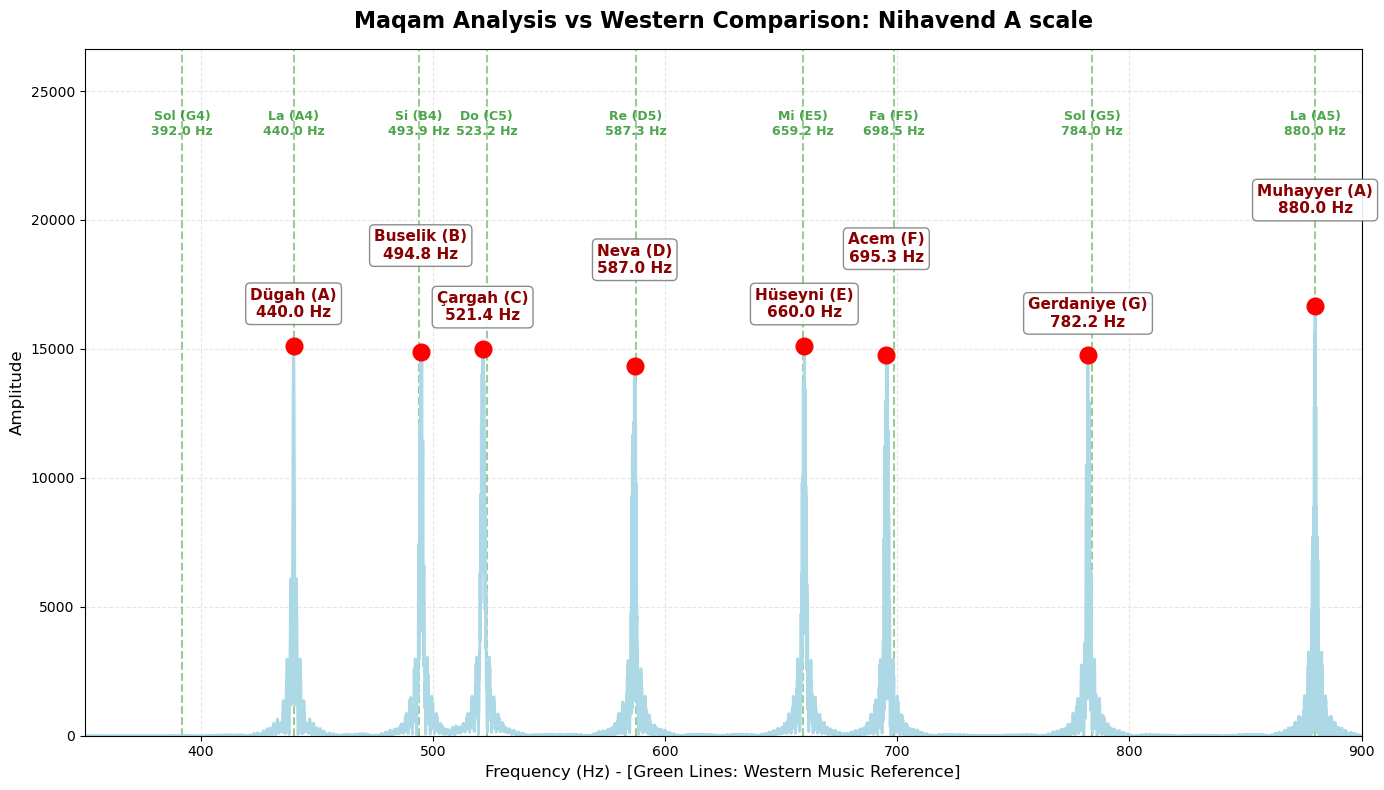

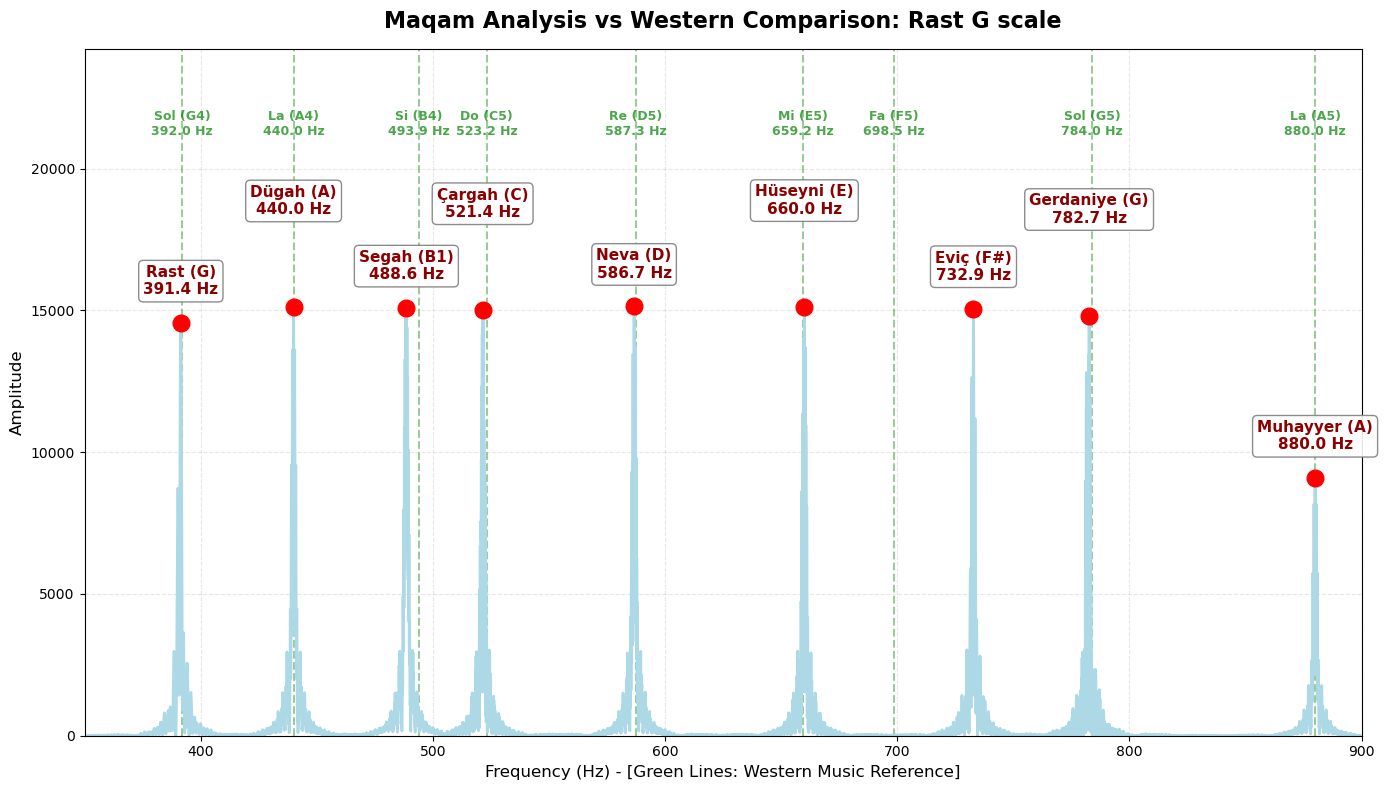

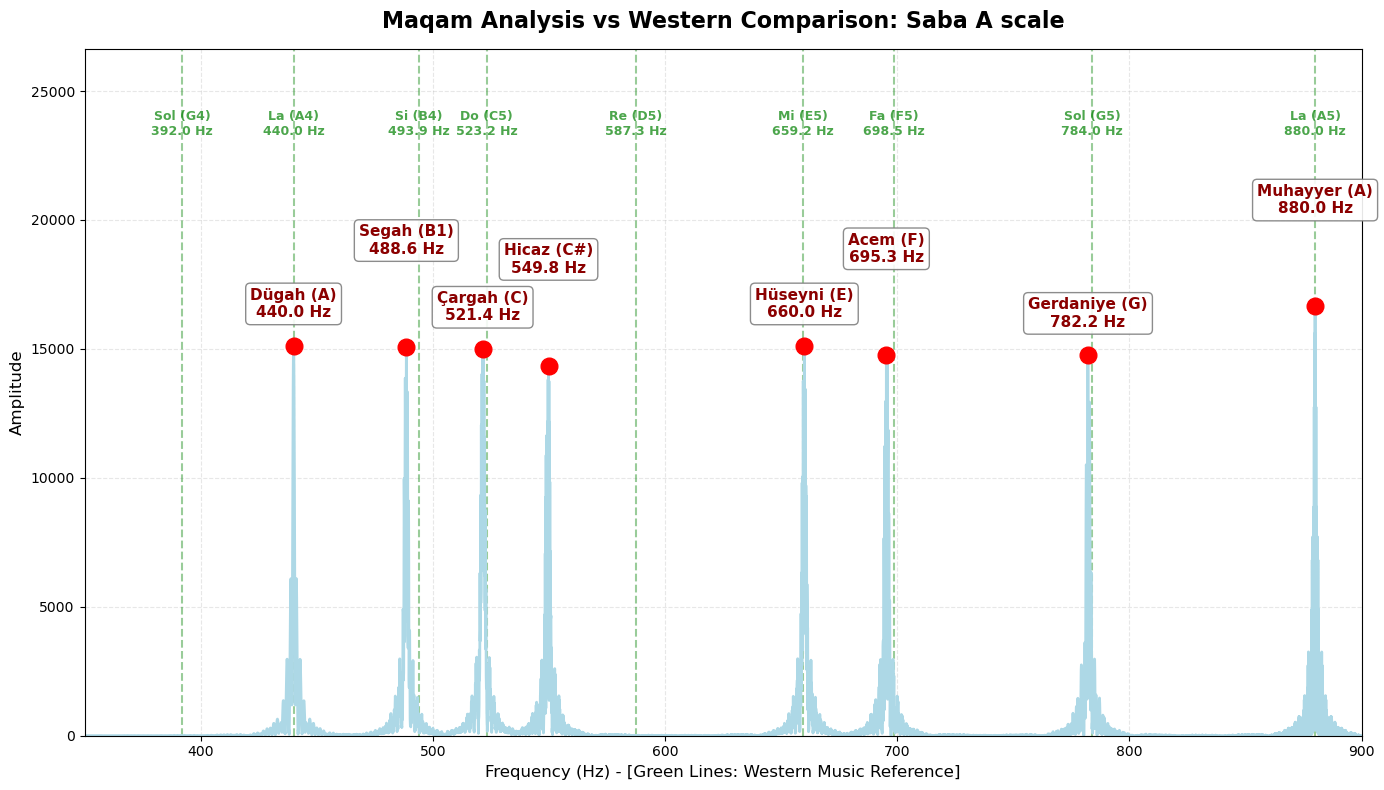

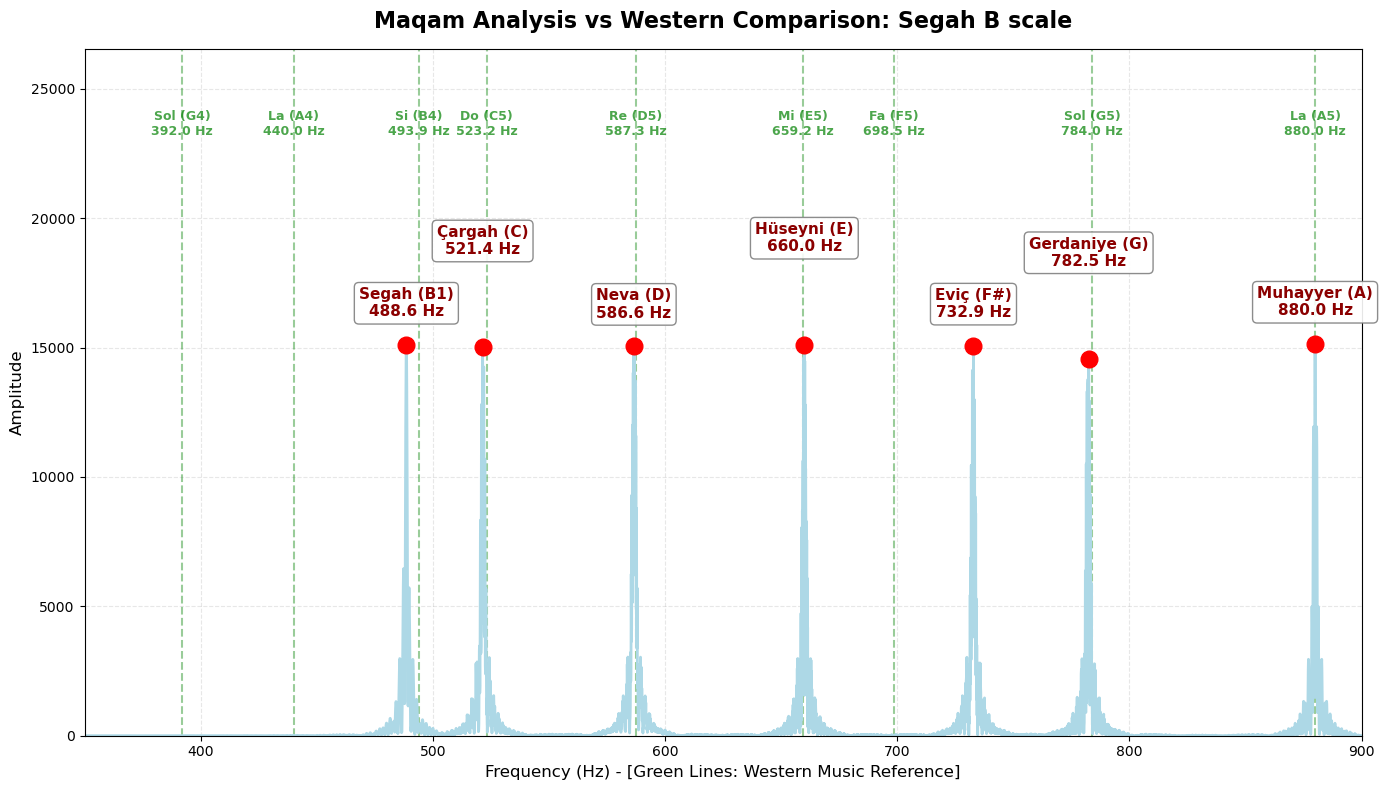

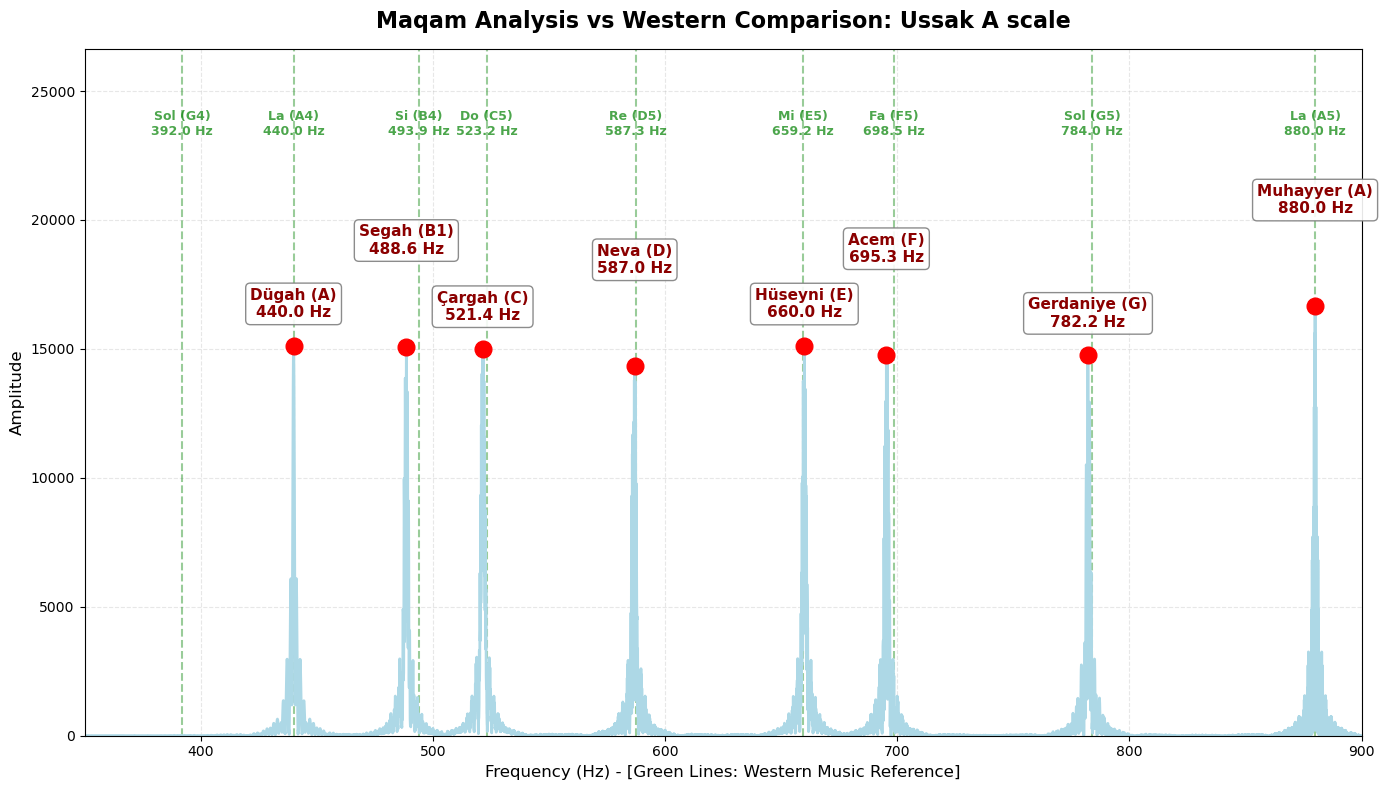

In [37]:
for i, filename in enumerate(files):
    # File Reading and Processing
    file_path = os.path.join(target_folder, filename)
    sr, audio = wavfile.read(file_path)
    
    if len(audio.shape) > 1: audio = audio.mean(axis=1)
    audio = audio / np.max(np.abs(audio))
    
    # Fourier (FFT)
    N = len(audio)
    yf = rfft(audio)
    xf = rfftfreq(N, 1 / sr)
    magnitude = np.abs(yf)
    
    # Peak Finding
    peaks, _ = find_peaks(magnitude, height=np.max(magnitude)*0.1, distance=sr/500)
    
    # PLOTTING 
    plt.figure(figsize=(14, 8)) 
    
    # A) DRAW WESTERN REFERENCE LINES FIRST 
    for nota_adi, freq in notes.items():
        if 350 < freq < 900:
            plt.axvline(x=freq, color='green', linestyle='--', alpha=0.4, linewidth=1.5)
            # Write Western note name at the top of the graph
            plt.text(freq, np.max(magnitude) * 1.40, 
                     f"{nota_adi}\n{freq:.1f} Hz",
                     color='green', fontsize=9, ha='center', fontweight='bold', alpha=0.7)

    # B) PLOT MAIN SIGNAL
    plt.plot(xf, magnitude, color='lightblue', linewidth=2, label="Maqam Signal")
    
    # C) MARK PEAK POINTS (Maqam Tones)
    pk_count = 0
    for p in peaks:
        freq = xf[p]
        amp = magnitude[p]
        if 350 < freq < 900:
            plt.plot(freq, amp, "ro", markersize=12)
            name = find_note_name(freq)
            if name:
                label = f"{name}\n{freq:.1f} Hz"
            else:
               label = f"{freq:.1f} Hz"
            offset_y = (pk_count % 2) * (np.max(magnitude) * 0.15)
            plt.text(freq, amp + (np.max(magnitude)*0.06) + offset_y, 
                     label, 
                     fontsize=11, 
                     ha='center', 
                     va='bottom',
                     color='darkred',
                     fontweight='bold',
                     bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', boxstyle='round,pad=0.3'))
            pk_count += 1

    #  VISUAL SETTINGS 
    plt.xlim(350, 900)
    plt.ylim(0, np.max(magnitude) * 1.6) 
    
    clean_name = filename.replace(".wav", "").replace("_", " ")
    plt.title(f"Maqam Analysis vs Western Comparison: {clean_name}", fontsize=16, fontweight='bold', pad=15)
    plt.ylabel("Amplitude", fontsize=12)
    plt.xlabel("Frequency (Hz) - [Green Lines: Western Music Reference]", fontsize=12)
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()